This file is where I establish to loops needed to efficently plot the desired outputs for each type of file

In [2]:
#imports!

# let's import things
import h5py as h5 
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')
import sys
import os
from scipy import stats
import seaborn as sns
import matplotlib as mpl

# Add the subdir to sys.path for our created scripts
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')
sys.path.append('/home/jovyan/home/research_work/making_figures/paper_figures/')

# Now you can import the module
import useful_fncs
import figure_utils
import utils_from_others

# import for axes labels 
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif"
})

In [3]:
# Let's now start with counting how many NSNS and WDWD systems there are in each simulation
# We need to loop through the files so let's make a list of all of the files we care about

files_of_interets = ['/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_AM_circumbinary/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_AM_MACLEOD_LINEAR/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_caseBB_AS_OTHER_MT/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_alpha025/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_alpha05/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_alpha075/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_alpha2/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_FORMALISM_TWO_STAGE/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_lambda_Dewi/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_lambda_Kruckow/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_lambda_Loveridge/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_postRLOF_survive/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_survive_mainseq/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_CE_survive_radiative/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N_5e6_MassiveWDWD_NSNS_fid/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_MS_accretor_mass_BRCEK/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_MT_fixed_0.5/MainRun/COMPAS_Output_wWeights.h5',
                     '/home/jovyan/CompasOutput/v03.21.00/N5e6_MassiveWDWD_NSNS_remnant_FRYER2022/MainRun/COMPAS_Output_wWeights.h5']

In [4]:
# Let's alos make a list of file names we would want to name plots

file_names_list = ['N5e6_MassiveWDWD_NSNS_AM_circumbinary',
                   'N5e6_MassiveWDWD_NSNS_AM_MACLEOD_LINEAR',
                   'N5e6_MassiveWDWD_NSNS_caseBB_AS_OTHER_MT',
                   'N5e6_MassiveWDWD_NSNS_CE_alpha025',
                   'N5e6_MassiveWDWD_NSNS_CE_alpha05',
                   'N5e6_MassiveWDWD_NSNS_CE_alpha075',
                   'N5e6_MassiveWDWD_NSNS_CE_alpha2',
                   'N5e6_MassiveWDWD_NSNS_CE_FORMALISM_TWO_STAGE',
                   'N5e6_MassiveWDWD_NSNS_CE_lambda_Dewi',
                   'N5e6_MassiveWDWD_NSNS_CE_lambda_Kruckow',
                   'N5e6_MassiveWDWD_NSNS_CE_lambda_Loveridge',
                   'N5e6_MassiveWDWD_NSNS_CE_postRLOF_survive',
                   'N5e6_MassiveWDWD_NSNS_CE_survive_mainseq',
                   'N5e6_MassiveWDWD_NSNS_CE_survive_radiative',
                   'N_5e6_MassiveWDWD_NSNS_fid',
                   'N5e6_MassiveWDWD_NSNS_MS_accretor_mass_BRCEK',
                   'N5e6_MassiveWDWD_NSNS_MT_fixed_0.5',
                   'N5e6_MassiveWDWD_NSNS_remnant_FRYER2022']

In [13]:
# Let's now loop through these files to find the number of systems in each

for i in range(len(files_of_interets)):
        print("{} This is for file {}." .format(figure_utils.systems_of_interest_counter(files_of_interets[i]), file_names_list[i]))


There are 144 NSNS systems from the DCO mask.
There are 2820201 WDWD systems from the DCO masks.
There are 2777344 COWD systems from the DCO masks.
None This is for file N5e6_MassiveWDWD_NSNS_AM_circumbinary.
There are 162 NSNS systems from the DCO mask.
There are 2774129 WDWD systems from the DCO masks.
There are 2729390 COWD systems from the DCO masks.
None This is for file N5e6_MassiveWDWD_NSNS_AM_MACLEOD_LINEAR.
There are 258 NSNS systems from the DCO mask.
There are 2823529 WDWD systems from the DCO masks.
There are 2810115 COWD systems from the DCO masks.
None This is for file N5e6_MassiveWDWD_NSNS_caseBB_AS_OTHER_MT.
There are 186 NSNS systems from the DCO mask.
There are 2090250 WDWD systems from the DCO masks.
There are 2075794 COWD systems from the DCO masks.
None This is for file N5e6_MassiveWDWD_NSNS_CE_alpha025.
There are 193 NSNS systems from the DCO mask.
There are 2783229 WDWD systems from the DCO masks.
There are 2772178 COWD systems from the DCO masks.
None This is fo

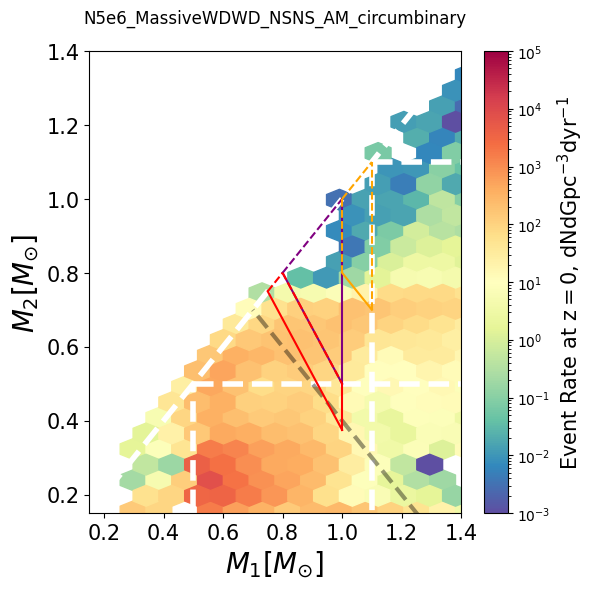

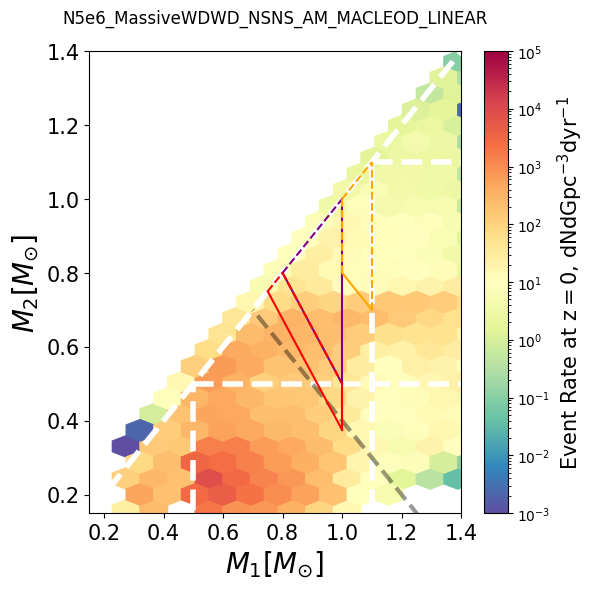

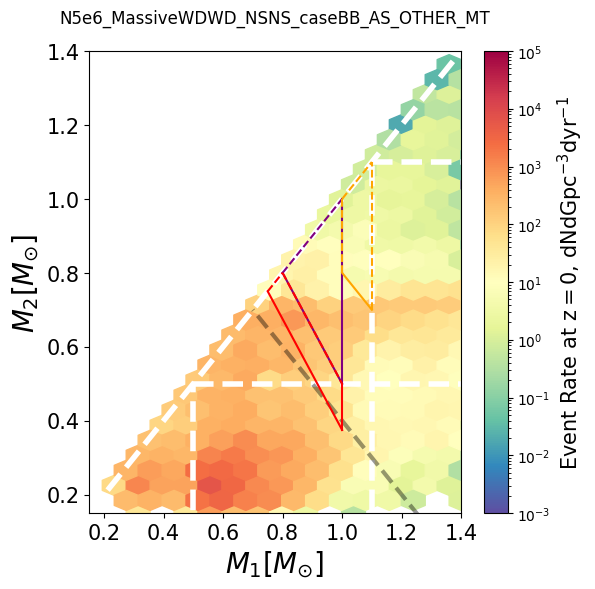

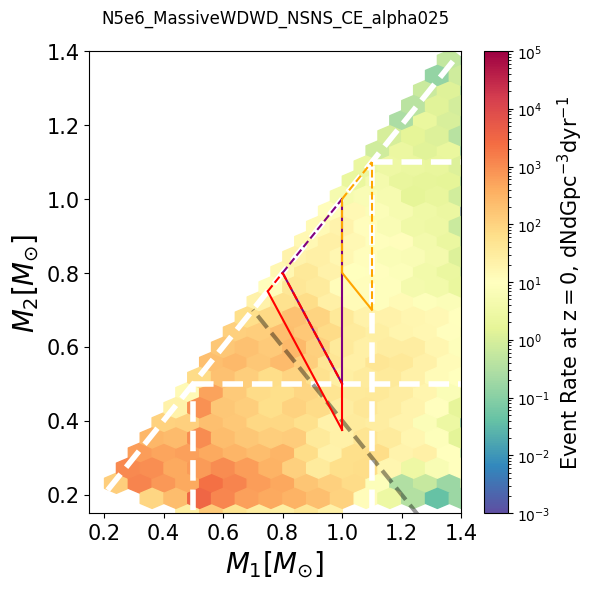

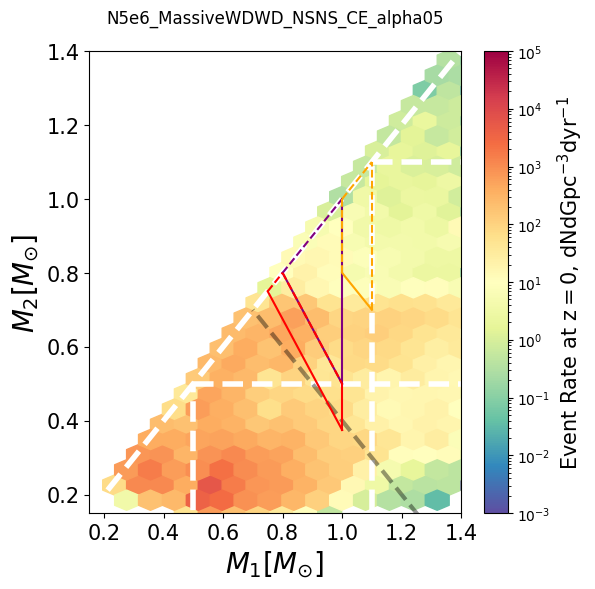

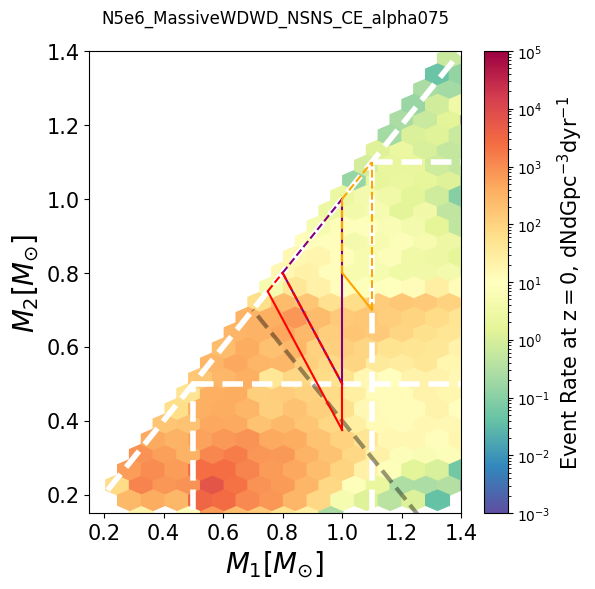

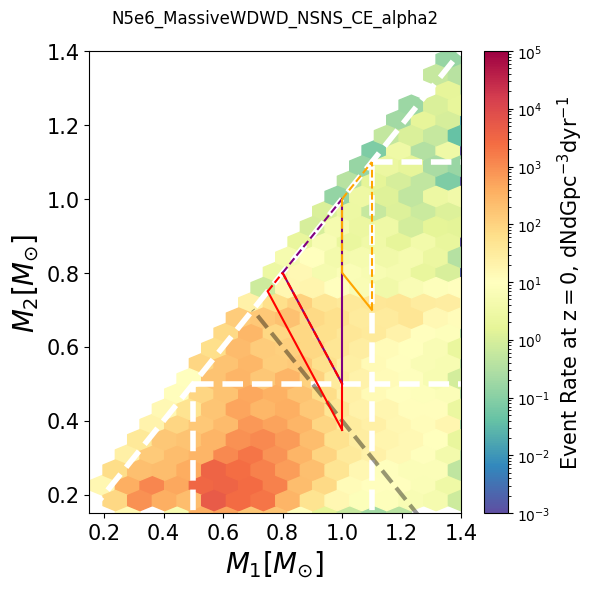

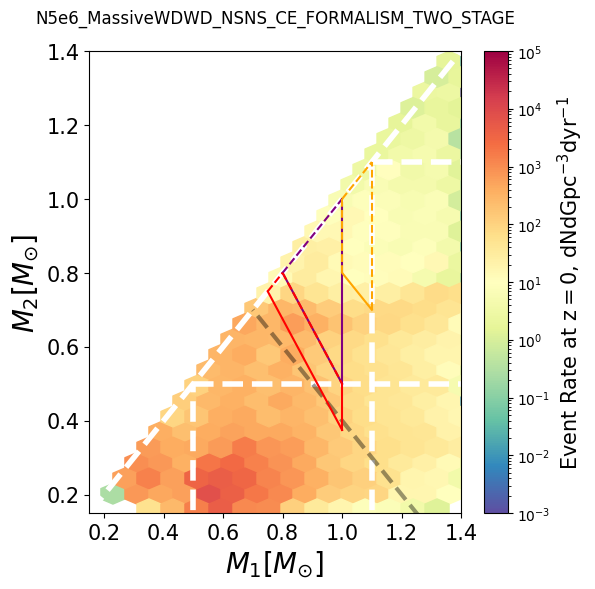

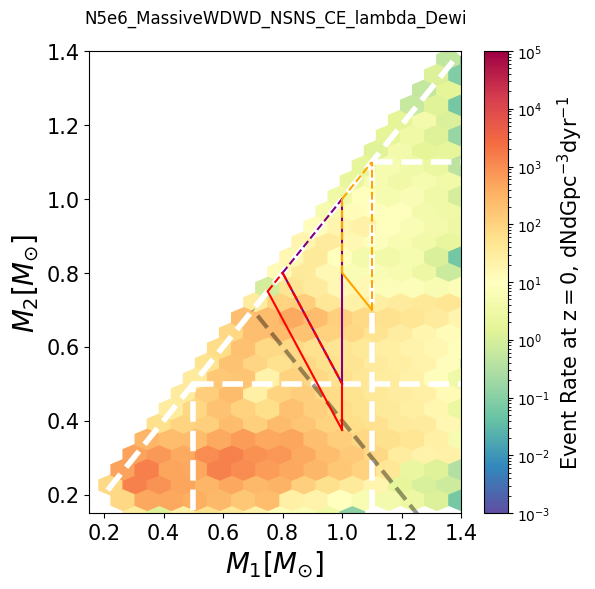

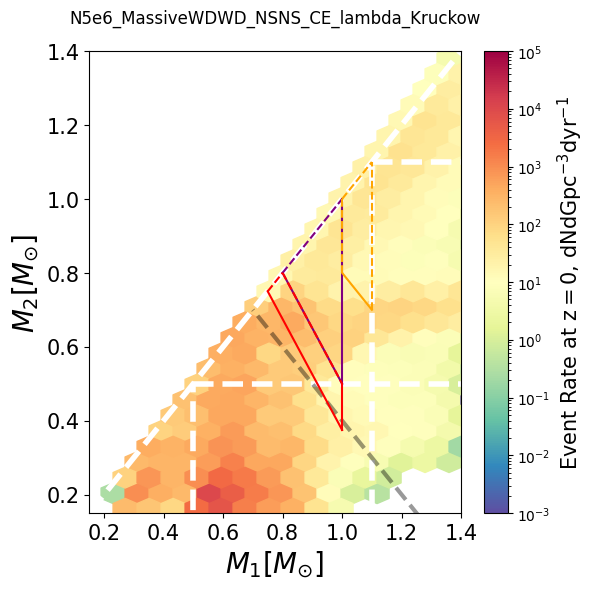

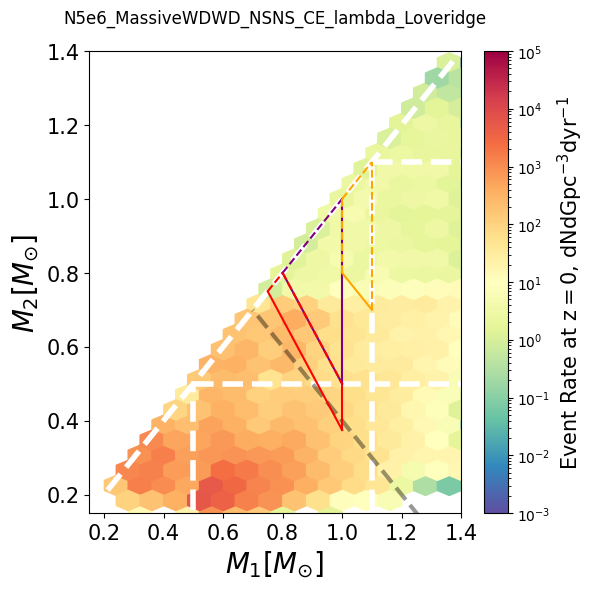

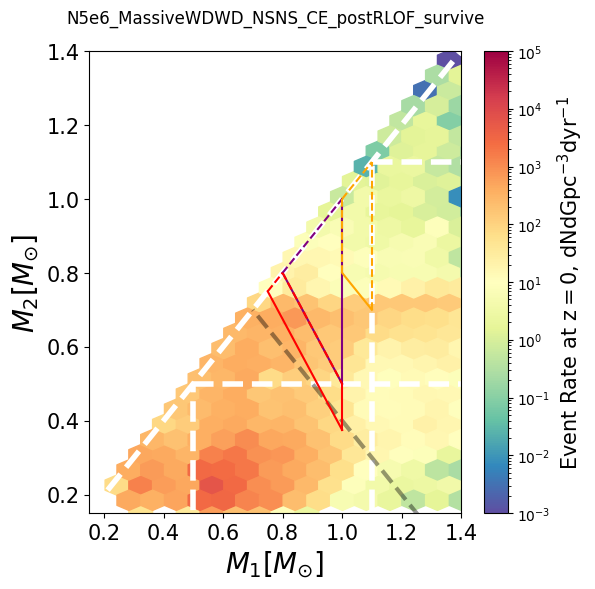

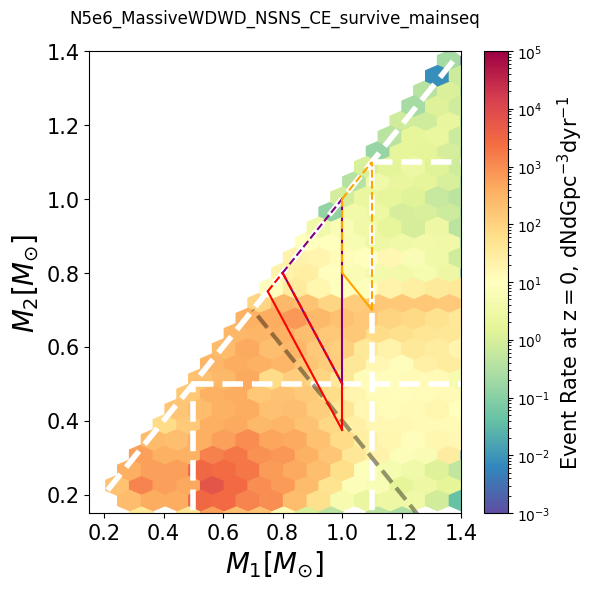

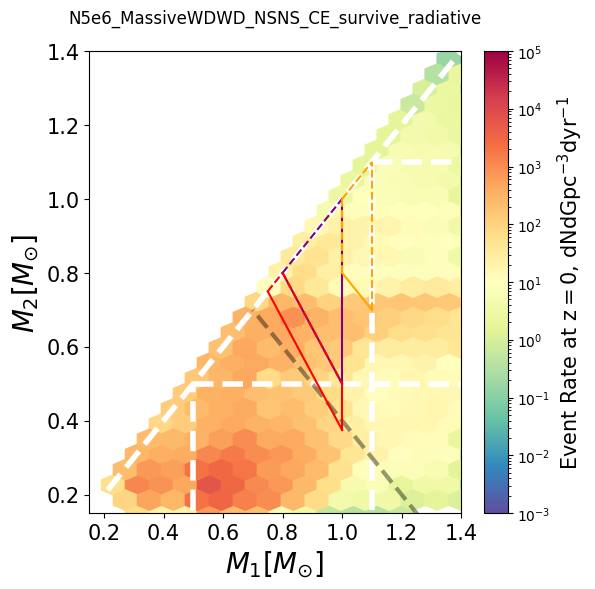

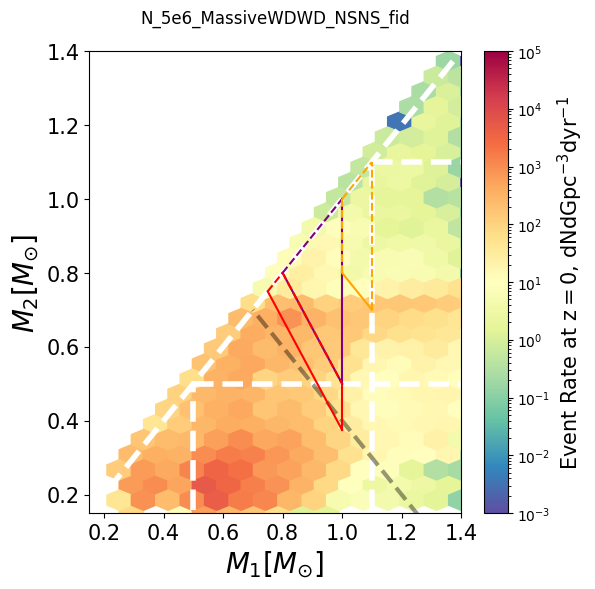

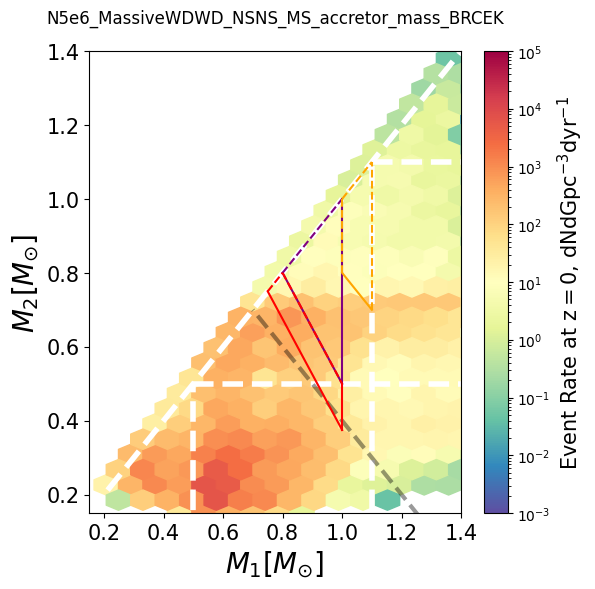

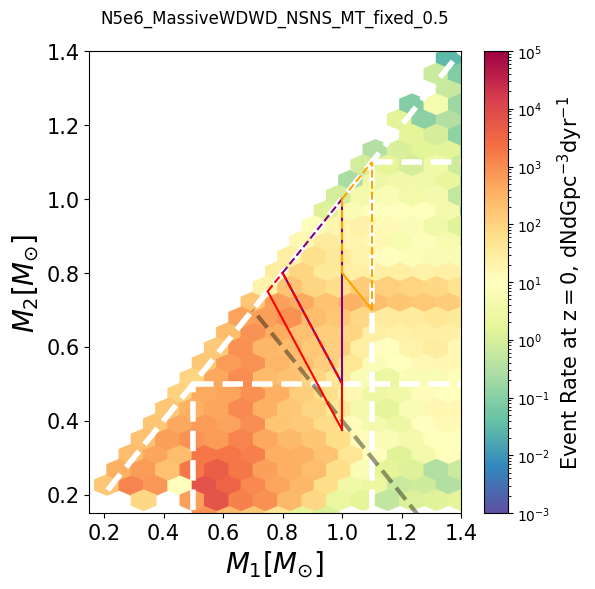

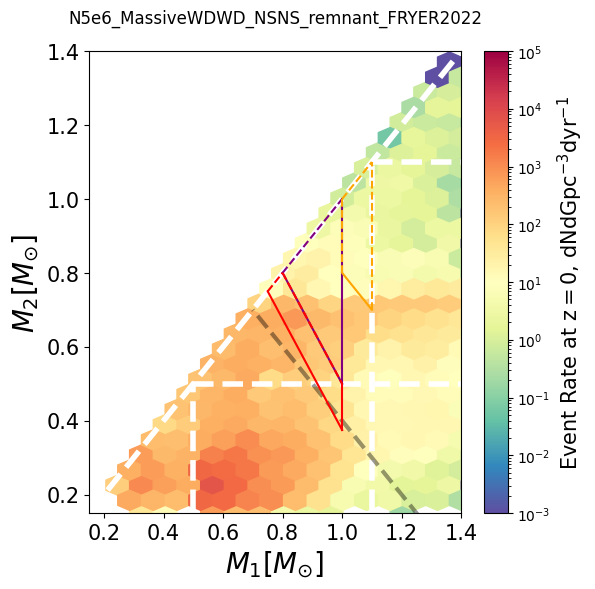

In [5]:
# Let's now plot the triangle plots

triangle_plots_output = './triangle_plots/'

for i in range(len(files_of_interets)):
    figure_utils.triangle_plot_fnc(files_of_interets[i], file_names_list[i], triangle_plots_output, file_names_list[i])

In [ ]:
# Let's plot all of the rates vs. redshift for each file

rates_plots_output = './rates_plots/'

for i in range(len(files_of_interets)):
    figure_utils.redshift_rates_plotter(files_of_interets[i], file_names_list[i], rates_plots_output, file_names_list[i])

In [ ]:
# Let's plot the metallicities

metallicity_plots_output = './metallicity_plots/'

for file in files_of_interets:
    figure_utils.metallicity_plotter(files_of_interets[i], file_names_list[i], metallicity_plots_output, file_names_list[i])

In [ ]:
# Let's plot the time distirbutions

time_plots_output = './time_plots/'

for file in files_of_interets:
    figure_utils.time_dist_plotter(files_of_interets[i], file_names_list[i], time_plots_output, file_names_list[i])